# Examples of Linear Regression with Polynomial Models

In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from datasets.polynomials import Polynomial
from models.linear_regression import LinearRegression
import time

## Approximating a Noisy Quadratic Function with Second-order Polynomial

In [17]:
quadratic = Polynomial()
train_x, train_y = quadratic.generate(400)
test_x, test_y = quadratic.generate(100)

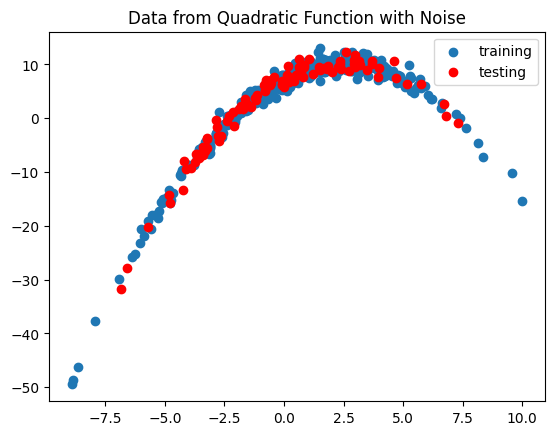

In [18]:
plt.scatter(train_x, train_y, label="training")
plt.scatter(test_x, test_y, label="testing", color="r")
plt.title("Data from Quadratic Function with Noise")
plt.legend()

avg training loss: 0.48877873599253685
avg testing loss: 0.5967797247165388
approximation: 7.1984 +2.2865x -0.4485x^2
actual function: 7.3254 + 2.2761x - 0.4491x^2


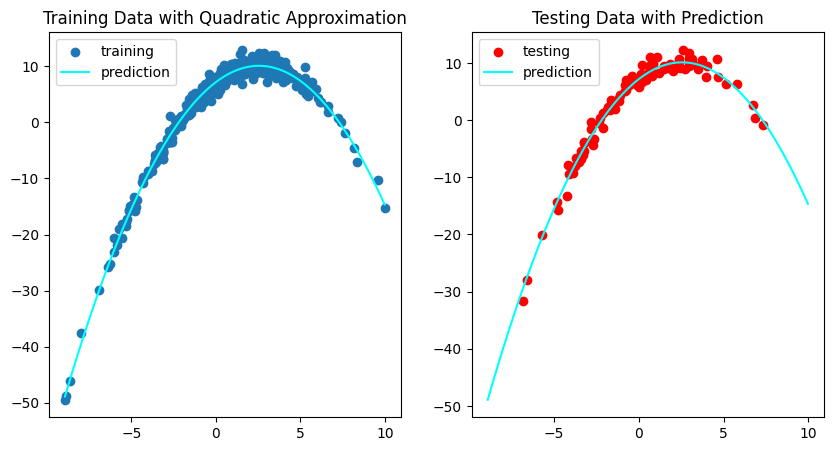

In [19]:
model = LinearRegression(order=2)
theta, train_loss = model.train(train_x, train_y)
_, test_loss = model.predict(test_x, theta, y=test_y)

print(f"avg training loss: {train_loss / len(train_x)}")
print(f"avg testing loss: {test_loss / len(test_x)}")
print(f"approximation: {model.to_string(theta)}")
print(f"actual function: {quadratic}")

plt_x = np.arange(min(min(train_x), min(test_x)), max(max(train_x), max(test_x)), 0.05)
plt_y = model.predict(plt_x, theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y, label="training")
ax[0].plot(plt_x, plt_y, c="cyan", label="prediction")
ax[0].set_title("Training Data with Quadratic Approximation")
ax[0].legend()

ax[1].scatter(test_x, test_y, c="r", label="testing")
ax[1].plot(plt_x, plt_y, c="cyan", label="prediction")
ax[1].set_title("Testing Data with Prediction")
ax[1].legend()


## Approximating Data with First- and Third-order Polynomials

linear approximation: 3.0581 +2.0061x
avg linear training loss: 21.362091950853
avg linear testing loss: 14.821422843694354
cubic approximation: 7.196 +2.2959x -0.4483x^2 -0.0003x^3
avg cubic training loss: 0.48851273158656716
avg cubic testing loss: 0.5973054772183707


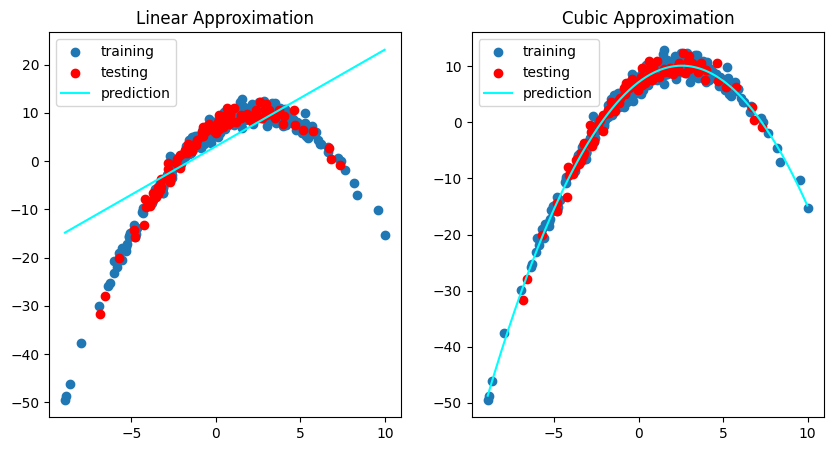

In [20]:
lin_model = LinearRegression(order=1)
lin_theta, lin_loss = lin_model.train(train_x, train_y)
_, lin_test_loss = lin_model.predict(test_x, lin_theta, y=test_y)

cub_model = LinearRegression(order=3)
cub_theta, cub_loss = cub_model.train(train_x, train_y)
_, cub_test_loss = cub_model.predict(test_x, cub_theta, y=test_y)

print(f"linear approximation: {lin_model.to_string(lin_theta)}")
print(f"avg linear training loss: {lin_loss / len(train_x)}")
print(f"avg linear testing loss: {lin_test_loss / len(test_x)}")
print(f"cubic approximation: {cub_model.to_string(cub_theta)}")
print(f"avg cubic training loss: {cub_loss / len(train_x)}")
print(f"avg cubic testing loss: {cub_test_loss / len(test_x)}")

lin_y = lin_model.predict(plt_x, lin_theta)
cub_y = cub_model.predict(plt_x, cub_theta)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].scatter(train_x, train_y, label="training")
ax[0].scatter(test_x, test_y, c="r", label="testing")
ax[0].plot(plt_x, lin_y, c="cyan", label="prediction")
ax[0].set_title("Linear Approximation")
ax[0].legend()

ax[1].scatter(train_x, train_y, label="training")
ax[1].scatter(test_x, test_y, c="r", label="testing")
ax[1].plot(plt_x, cub_y, c="cyan", label="prediction")
ax[1].set_title("Cubic Approximation")
ax[1].legend()

## Regression Higher-order Polynomials

-16.1438 - 2.0444x - 0.0301x^2 + 0.1222x^3 - 0.0021x^4 + 0.0021x^5 - 0.0001x^6 - 0.0001x^7


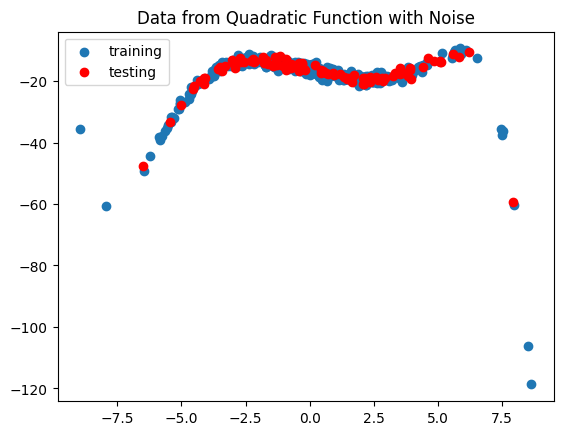

In [35]:
quadratic = Polynomial(order=7)
train_x, train_y = quadratic.generate(400)
test_x, test_y = quadratic.generate(100)
print(quadratic)

plt.scatter(train_x, train_y, label="training")
plt.scatter(test_x, test_y, label="testing", color="r")
plt.title("Data from Quadratic Function with Noise")
plt.legend()

order 7 training loss: 0.44734120433749547
order 7 testing loss: 0.4730824967227769
order 5 training loss: 1.4827780520092224
order 5 testing loss: 1.1430651758633186
order 3 training loss: 22.640206684383067
order 3 testing loss: 15.897721345107177


Text(0.5, 1.0, 'Order 3 approximation')

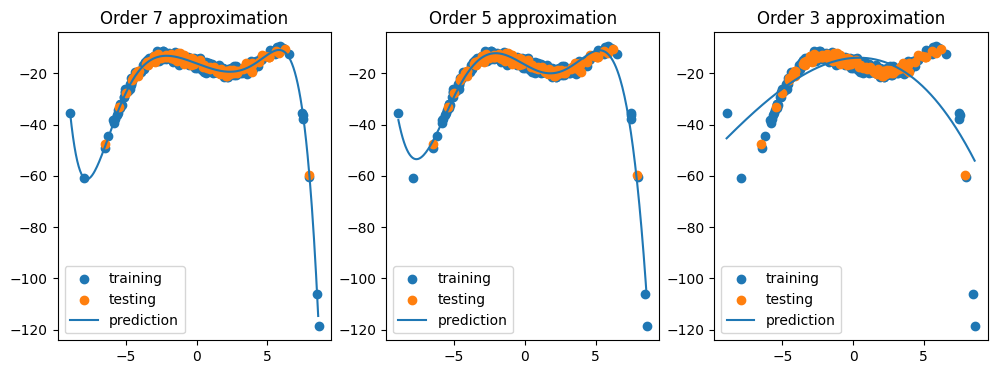

In [37]:
order_7 = LinearRegression(order=7)
order_5 = LinearRegression(order=5)
order_3 = LinearRegression(order=3)

plt_x = np.arange(min(min(train_x), min(test_x)), max(max(train_x), max(test_x)), 0.05)

order_7_theta, order_7_train_loss = order_7.train(train_x, train_y)
plt_order_7 = order_7.predict(plt_x, order_7_theta)
_, order_7_test_loss = order_7.predict(test_x, order_7_theta, test_y)

order_5_theta, order_5_train_loss = order_5.train(train_x, train_y)
plt_order_5 = order_5.predict(plt_x, order_5_theta)
_, order_5_test_loss = order_5.predict(test_x, order_5_theta, test_y)

order_3_theta, order_3_train_loss = order_3.train(train_x, train_y)
plt_order_3 = order_3.predict(plt_x, order_3_theta)
_, order_3_test_loss = order_3.predict(test_x, order_3_theta, test_y)

print(f"order 7 training loss: {order_7_train_loss / len(train_x)}")
print(f"order 7 testing loss: {order_7_test_loss / len(test_x)}")

print(f"order 5 training loss: {order_5_train_loss / len(train_x)}")
print(f"order 5 testing loss: {order_5_test_loss / len(test_x)}")

print(f"order 3 training loss: {order_3_train_loss / len(train_x)}")
print(f"order 3 testing loss: {order_3_test_loss / len(test_x)}")

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

ax[0].scatter(train_x, train_y, label="training")
ax[0].scatter(test_x, test_y, label="testing")
ax[0].plot(plt_x, plt_order_7, label="prediction")
ax[0].legend()
ax[0].set_title("Order 7 approximation")

ax[1].scatter(train_x, train_y, label="training")
ax[1].scatter(test_x, test_y, label="testing")
ax[1].plot(plt_x, plt_order_5, label="prediction")
ax[1].legend()
ax[1].set_title("Order 5 approximation")

ax[2].scatter(train_x, train_y, label="training")
ax[2].scatter(test_x, test_y, label="testing")
ax[2].plot(plt_x, plt_order_3, label="prediction")
ax[2].legend()
ax[2].set_title("Order 3 approximation")


## Regression with First-order Higher-dimensional Polynomials

In [ ]:
higher_dimensional = Polynomial(order=1, dim=100)
train_x, train_y = higher_dimensional.generate(4000)
test_x, test_y = higher_dimensional.generate(1000)

In [ ]:
higher_model = LinearRegression(input_dim=100)
theta, train_loss = higher_model.train(train_x, train_y)
_, test_loss = higher_model.predict(test_x, theta, y=test_y)
print(f"avg training loss: {train_loss / len(train_x)}")
print(f"avg testing loss: {test_loss / len(test_x)}")

avg training loss: 0.4914108974408041
avg testing loss: 0.5107381189483696


## Regression with Second-order higher-dimensional Polynomials

In [ ]:
higher_dimensional_2 = Polynomial(order=2, dim=20)
train_x, train_y = higher_dimensional_2.generate(4000)
test_x, test_y = higher_dimensional_2.generate(1000)

In [ ]:
first_order = LinearRegression(input_dim=20)
fo_theta, fo_train_loss = first_order.train(train_x, train_y)
_, fo_test_loss = first_order.predict(test_x, fo_theta, y=test_y)
print(f"first-order avg training loss: {fo_train_loss / len(train_x)}")
print(f"first-order avg testing loss: {fo_test_loss / len(test_x)}")

second_order = LinearRegression(order=2, input_dim=20)
so_theta, so_train_loss = second_order.train(train_x, train_y)
_, so_test_loss = second_order.predict(test_x, so_theta, y=test_y)
print(f"second-order avg training loss: {so_train_loss / len(train_x)}")
print(f"second-order avg testing loss: {so_test_loss / len(test_x)}")

first-order avg training loss: 8141.563601272742
first-order avg testing loss: 8966.354082938191
second-order avg training loss: 0.4916248738079973
second-order avg testing loss: 0.5012161520068354
